In [3]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("data/train.csv",
                 usecols=["SalePrice","GrLivArea","BedroomAbvGr","FullBath","HalfBath"])

In [5]:
import numpy as np
# 1.1 feature engineering
df["TotalBath"] = df["FullBath"] + 0.5 * df["HalfBath"]

# 1.2 log–transform target and area to reduce skew
df["LogPrice"] = np.log1p(df["SalePrice"])
df["LogArea"]  = np.log1p(df["GrLivArea"])

# 1.3 assemble feature matrix and target
X = df[["LogArea", "BedroomAbvGr", "TotalBath"]]
y = df["LogPrice"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape)

(1168, 3) (292, 3)


In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
pred = lr.predict(X_test)

from sklearn.metrics import root_mean_squared_error, r2_score

rmse = root_mean_squared_error(y_test, pred)
print(f"Baseline RMSE (log-space): {rmse:.4f}")
print(f"R²: {r2_score(y_test, pred):.3f}")
print("≈ ${:,.0f} average error".format(np.expm1(rmse)))

Baseline RMSE (log-space): 0.2618
R²: 0.633
≈ $0 average error


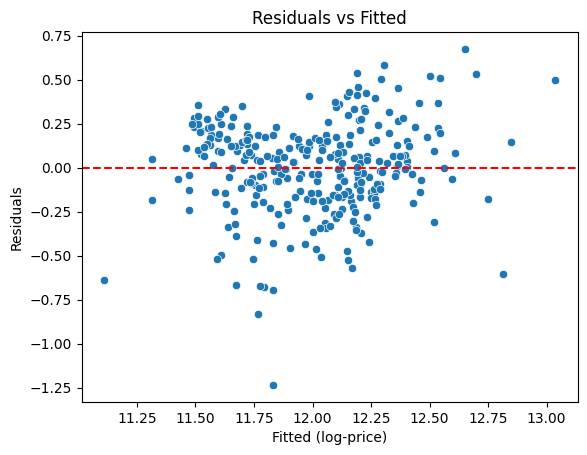

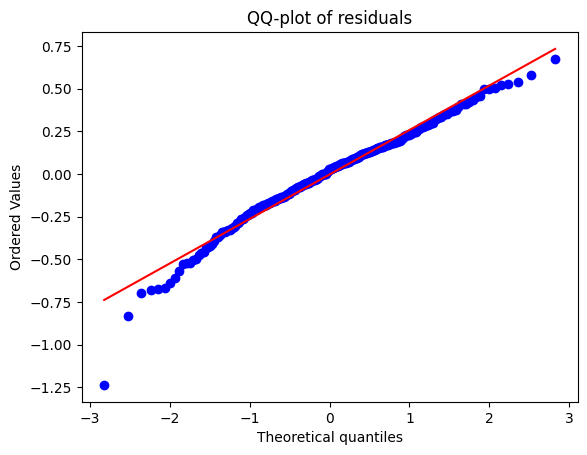

In [8]:
import seaborn as sns, matplotlib.pyplot as plt, scipy.stats as stats
residuals = y_test - pred

sns.scatterplot(x=pred, y=residuals)
plt.axhline(0, ls="--", color="red")
plt.xlabel("Fitted (log-price)"); plt.ylabel("Residuals")
plt.title("Residuals vs Fitted"); plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-plot of residuals"); plt.show()

In [11]:
import joblib, pathlib, os

# lr  is the LinearRegression() object you already fitted
MODEL_DIR = pathlib.Path("../models")
MODEL_DIR.mkdir(exist_ok=True)

joblib.dump(lr, MODEL_DIR / "linear.joblib")



['..\\models\\linear.joblib']